# Logistic Regression on IRIS Dataset

In [1]:
# Importing the necessary libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
# Importing the dataset
dataset = pd.read_csv('iris.csv')

In [3]:
dataset.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [39]:
# Splitting the dataset into the Training set Test set
X = dataset.iloc[:, [0,1,2, 3]].values  #input features
y = dataset.iloc[:, 4].values  #target

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [40]:
X_val

array([[5.5, 2.6, 4.4, 1.2],
       [5.2, 3.5, 1.5, 0.2],
       [6.1, 2.9, 4.7, 1.4],
       [5.2, 2.7, 3.9, 1.4],
       [6.7, 3.1, 4.7, 1.5],
       [6.4, 2.8, 5.6, 2.2],
       [6. , 2.2, 4. , 1. ],
       [5.1, 3.8, 1.9, 0.4],
       [6.1, 2.8, 4.7, 1.2],
       [6.1, 3. , 4.9, 1.8],
       [6.2, 2.8, 4.8, 1.8],
       [5. , 3.5, 1.3, 0.3],
       [4.4, 2.9, 1.4, 0.2],
       [5.7, 3.8, 1.7, 0.3],
       [5.6, 3. , 4.5, 1.5],
       [5.4, 3.9, 1.3, 0.4],
       [6.1, 2.8, 4. , 1.3],
       [5.8, 2.6, 4. , 1.2],
       [6.9, 3.1, 5.1, 2.3],
       [7.3, 2.9, 6.3, 1.8],
       [5.8, 2.8, 5.1, 2.4],
       [5.4, 3.7, 1.5, 0.2]])

In [41]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
'''The fit_transform() method computes the mean and standard deviation of each feature in the training set and standardizes the features accordingly. 
Then, the transform() method is used to apply the same transformation to the test set using the scaling parameters learned from the training set.'''
X_train = sc.fit_transform(X_train)

X_test = sc.transform(X_test)

In [42]:
X_train

array([[ 1.54399532e-02, -1.19254753e-01,  2.25126850e-01,
         3.56381749e-01],
       [-9.98450310e-02, -1.04039491e+00,  1.13559562e-01,
        -2.86480506e-02],
       [ 1.05300481e+00, -1.19254753e-01,  9.50314227e-01,
         1.12644135e+00],
       [-1.36797986e+00,  3.41315328e-01, -1.39259884e+00,
        -1.31208072e+00],
       [ 1.16828980e+00,  1.11030287e-01,  7.27179649e-01,
         1.38312788e+00],
       [-1.02212490e+00,  1.03217045e+00, -1.22524790e+00,
        -7.98707650e-01],
       [-5.60984968e-01,  1.49274053e+00, -1.28103155e+00,
        -1.31208072e+00],
       [-1.02212490e+00, -2.42210516e+00, -1.65358660e-01,
        -2.85334584e-01],
       [ 7.07149859e-01, -1.19254753e-01,  9.50314227e-01,
         7.41411549e-01],
       [ 9.37719827e-01,  5.71600368e-01,  1.06188152e+00,
         1.63981441e+00],
       [ 1.30724937e-01, -1.96153508e+00,  6.71396005e-01,
         3.56381749e-01],
       [ 9.37719827e-01, -1.27067995e+00,  1.11766516e+00,
      

In [43]:
# Fitting Logistic Regression to the Training set
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0, solver='lbfgs', multi_class='auto')
classifier.fit(X_train, y_train)

LogisticRegression(random_state=0)

In [44]:
# Evaluate the model on the test set
test_accuracy = classifier.score(X_test, y_test)
print("Test Accuracy:", test_accuracy)

Test Accuracy: 0.9736842105263158


In [45]:
# Predicting the Test set results
y_pred = classifier.predict(X_test)

In [46]:
# Predict probabilities
probs_y=classifier.predict_proba(X_test)

Note : Sci-Kit learn is using a default threshold of P>0.5 for binary classifications.

In [47]:
probs_y = np.round(probs_y, 2)

In [48]:
res = "{:<10} | {:<10} | {:<10} | {:<13} | {:<5}".format("y_test", "y_pred", "Setosa(%)", "versicolor(%)", "virginica(%)\n")
res += "-"*65+"\n"
res += "\n".join("{:<10} | {:<10} | {:<10} | {:<13} | {:<10}".format(x, y, a, b, c) for x, y, a, b, c in 
                 zip(y_test, y_pred, probs_y[:,0], probs_y[:,1], probs_y[:,2]))
res += "\n"+"-"*65+"\n"
print(res)

y_test     | y_pred     | Setosa(%)  | versicolor(%) | virginica(%)
-----------------------------------------------------------------
virginica  | virginica  | 0.0        | 0.03          | 0.97      
versicolor | versicolor | 0.01       | 0.95          | 0.04      
setosa     | setosa     | 1.0        | 0.0           | 0.0       
virginica  | virginica  | 0.0        | 0.08          | 0.92      
setosa     | setosa     | 0.98       | 0.02          | 0.0       
virginica  | virginica  | 0.0        | 0.01          | 0.99      
setosa     | setosa     | 0.98       | 0.02          | 0.0       
versicolor | versicolor | 0.01       | 0.71          | 0.28      
versicolor | versicolor | 0.0        | 0.73          | 0.27      
versicolor | versicolor | 0.02       | 0.89          | 0.08      
virginica  | virginica  | 0.0        | 0.44          | 0.56      
versicolor | versicolor | 0.02       | 0.76          | 0.22      
versicolor | versicolor | 0.01       | 0.85          | 0.13      
versicol

In [49]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[13  0  0]
 [ 0 15  1]
 [ 0  0  9]]


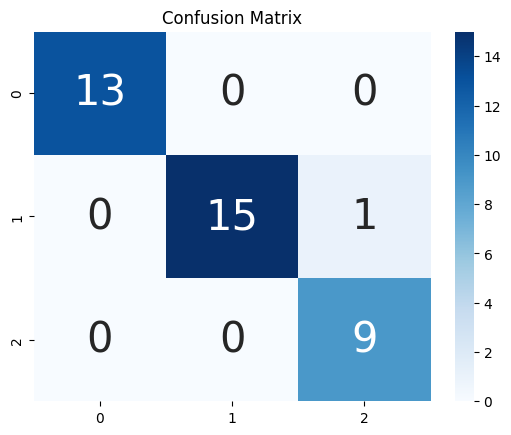

In [50]:
# Plot confusion matrix
import seaborn as sns
import pandas as pd

ax = plt.axes()
df_cm = cm
sns.heatmap(df_cm, annot=True, annot_kws={"size": 30}, fmt='d',cmap="Blues", ax = ax )
ax.set_title('Confusion Matrix')
plt.show()